In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import re

In [3]:
pip install semantic-text-similarity

     |████████████████████████████████| 419kB 6.9MB/s 
     |████████████████████████████████| 163kB 10.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 8.3MB/s 
     |████████████████████████████████| 133kB 21.3MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 7.2MB 22.1MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.2-cp36-cp36m-linux_x86_64.whl size=148898 sha256=66401e9161991e4936b1c1d62a6f8b5c06452d9468aa7785fb1c2729fe67c364
  Stored in directory: /root/.cache/pip/wheels/b3/26/73/4b48503bac73f01cf18e52cd250947049a7f339e940c5df8fc
Successfully built python-levenshtein
ERROR: botocore 1.20.7 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [4]:
pip install git+https://github.com/AndriyMulyar/semantic-text-similarity

  Cloning https://github.com/AndriyMulyar/semantic-text-similarity to /tmp/pip-req-build-gd0_vo9v
  Running command git clone -q https://github.com/AndriyMulyar/semantic-text-similarity /tmp/pip-req-build-gd0_vo9v
  Created wheel for semantic-text-similarity: filename=semantic_text_similarity-1.0.3-cp36-none-any.whl size=416025 sha256=2af0ff0fad8a072f9907ff265a24a18bc9d08e5a89d857a1d1da2f64370ceac2
  Stored in directory: /tmp/pip-ephem-wheel-cache-l_rm9mzo/wheels/14/52/19/87a3a9463ca3180550776ec1a20f90581e81c36a27142c7a15
Successfully built semantic-text-similarity


In [5]:
pip install -U sentence-transformers

     |████████████████████████████████| 71kB 3.4MB/s 
     |████████████████████████████████| 1.8MB 7.0MB/s 
     |████████████████████████████████| 890kB 13.1MB/s 
     |████████████████████████████████| 3.2MB 32.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=94cbcc4529d99a427791320f6010d67e1f0c0e82c763ed7b81b1f19ca79d5c55
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=4585f554e31311f5ac2df45476d1860c08741d5ea1cd5b68467e9d3b195b9ce5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [6]:
pip install umap-learn

In [7]:
df = pd.read_excel('SC_Posts_1.xls', header=None)
df.columns = ['post']

df.shape

(17946, 1)

In [8]:
df = df[(df['post'].str.find('FALSE')==-1)]
df = df[(df['post'].str.find('Comments')==-1)]
df.shape

(12274, 1)

In [9]:
# function to preprocess speech
def clean(text):
    
    # removing paragraph numbers
    text = re.sub('[0-9]+.\t','',str(text))
    
    #text.replace('[^a-zA-Z]', '')
    #text.replace('[^\w\s]', '')
    #text = re.sub('[^a-zA-Z]', ' ', text)
    #text = re.sub(r'\s+', ' ', text)
    
    # removing new line characters
    text = re.sub('\n ','',str(text))
    text = re.sub('\n',' ',str(text))
    # removing apostrophes
    text = re.sub("'s",'',str(text))
    # removing hyphens
    text = re.sub("-",' ',str(text))
    text = re.sub("— ",'',str(text))
    # removing quotation marks
    text = re.sub('\"','',str(text))
    # removing any reference to outside text
    text = re.sub("[\(\[].*?[\)\]]", "", str(text))
    
    return text

# preprocessing speeches
df['post_clean'] = df['post'].apply(clean)
df.shape

(12274, 2)

In [10]:
def preprocess_sent(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^a-zA-Z]', '')
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = re.sub('[^a-zA-Z]', ' ', processed_tweet)
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet)
    return(processed_tweet)

df['Processed_Sent'] = df['post_clean'].apply(lambda x: preprocess_sent(x))
df.head()

,post,post_clean,Processed_Sent
0,Shannon Murray Gormley,Shannon Murray Gormley,Shannon Murray Gormley
2,Just wanted to let anyone know if you are able...,Just wanted to let anyone know if you are able...,Just wanted to let anyone know if you are able...
4,Alicia Gottschalk,Alicia Gottschalk,Alicia Gottschalk
5,My hubby had it last week and it has done wond...,My hubby had it last week and it has done wond...,My hubby had it last week and it has done wond...
7,Laura Sutera,Laura Sutera,Laura Sutera


In [11]:
df = df[df['Processed_Sent'].str.strip().str.len()>0]
df.shape

(11557, 3)

In [12]:
# Column to be utilized is Processed_Sent

In [13]:
from semantic_text_similarity.models import WebBertSimilarity

web_model = WebBertSimilarity(device='cpu', batch_size=10) #defaults to GPU prediction

100%|██████████| 405359924/405359924 [00:05<00:00, 68981505.29B/s]


In [14]:
unique_posts = list(df['Processed_Sent'])
len(unique_posts)

11557

In [26]:
# to check if keyswords like 'monoclonal antibody treatment', etc. present in sentences

def prog_sent(text):
    
    patterns = [r'\b(?i)'+'monoclonal antibody treatment'+r'\b',
               r'\b(?i)'+'monoclonal antibodies treatment'+r'\b',
                r'\b(?i)'+'monoclonal antibody'+r'\b',
                r'\b(?i)'+'monoclonal antibodies'+r'\b',
                r'\b(?i)'+'antibody treatment'+r'\b',
                r'\b(?i)'+'antibodies treatment'+r'\b',
                r'\b(?i)'+'antibodies treatments'+r'\b',
               r'\b(?i)'+'infusion treatment'+r'\b',
                r'\b(?i)'+'infusions treatment'+r'\b',
                r'\b(?i)'+'infusions treatments'+r'\b',
                r'\b(?i)'+'monoclonal'+r'\b',
                r'\b(?i)'+'infusion'+r'\b',
                r'\b(?i)'+'infusions'+r'\b',
               r'\b(?i)'+'regeneron'+r'\b',
               r'\b(?i)'+'eli lilly'+r'\b']

    output = []
    flag = 0
    for pat in patterns:
        if re.search(pat, text) != None:
            flag = 1
            break
    return flag 

# apply function
df['Check_Phrases'] = df['Processed_Sent'].apply(prog_sent)
df2 = df[df['Check_Phrases']>0]
df3 = df2.drop_duplicates(subset = ["Processed_Sent"])

unique_posts = list(df3['Processed_Sent'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)monoclonal ant' (truncated)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)antibody treat' (truncated)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)antibodies tre' (truncated)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)infusion treat' (truncated)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)infusions trea' (truncated)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Flags not at the start of the expression '\\b(?i)monoclonal\\b'
/usr/local/lib/python3.6/dist-packages/ip

In [29]:
len(unique_posts)

146

In [30]:
def Model_Prediction(unique_input_item, master_category):
  out = []
  for i in unique_input_item:
    bst = []
    for mstr in master_category:
      val = web_model.predict([(mstr, i)])
      bst.append(val.tolist())
    d = dict(zip(master_category, bst))
    category = list(dict(sorted(d.items(), key=lambda x: x[1], reverse=True)[:1]).keys())
    out.append(category)

  return out

In [33]:
# 'Received Infusion', 'Did Not Receive Infusion'
sentence_groups = ['Received Infusion', 'Did Not Receive Infusion']
out_inf = Model_Prediction(unique_posts, sentence_groups)

#'Received Monoclonal Antibody Treatment', 'Did Not Receive Monoclonal Antibody Treatment'
sentence_groups = ['Received Monoclonal Antibody Treatment', 'Did Not Receive Monoclonal Antibody Treatment']
out_mat = Model_Prediction(unique_posts, sentence_groups)

#'Received Monoclonal Antibodies', 'Did Not Receive Monoclonal Antibodies'
sentence_groups = ['Received Monoclonal Antibodies', 'Did Not Receive Monoclonal Antibodies']
out_ma = Model_Prediction(unique_posts, sentence_groups)

#'Received Antibodies', 'Did Not Receive Antibodies'
sentence_groups = ['Received Antibodies', 'Did Not Receive Antibodies']
out_a = Model_Prediction(unique_posts, sentence_groups)

In [34]:
dfout = pd.DataFrame([unique_posts, out_inf, out_mat, out_ma, out_a]).T
dfout = dfout.rename(columns={0:'Post', 1:'Infusion', 2:'MAT', 3:'MA', 4:'A'})

In [35]:
dfout['Infusion'] = dfout['Infusion'].astype(str).str.replace('\[|\]|\'', '')
dfout['MAT'] = dfout['MAT'].astype(str).str.replace('\[|\]|\'', '')
dfout['MA'] = dfout['MA'].astype(str).str.replace('\[|\]|\'', '')
dfout['A'] = dfout['A'].astype(str).str.replace('\[|\]|\'', '')

dfout['Infusion'] = dfout['Infusion'].apply(lambda x: x=='Received Infusion')
dfout['MAT'] = dfout['MAT'].apply(lambda x: x=='Received Monoclonal Antibody Treatment')
dfout['MA'] = dfout['MA'].apply(lambda x: x=='Received Monoclonal Antibodies')
dfout['A'] = dfout['A'].apply(lambda x: x=='Received Antibodies')

In [36]:
dfout_with_infusion = dfout[(dfout['Infusion']==True)|(dfout['MAT']==True)|(dfout['MA']==True)|(dfout['A']==True)]
dfout_with_infusion.shape

(132, 5)

In [37]:
dfout_with_infusion['Post'][:50]

0     Just wanted to let anyone know if you are able...
2     I joined the Regeneron Remdisivir double blind...
3     My husband joined the prevention of Covid for ...
4     You CAN NOT get these infusions with out being...
5     Here is the link to the clinical trial page ht...
6     If you must search inside clinical trials gov ...
7     Safety Tolerability and Efficacy of Anti Spike...
8     Study Assessing the Efficacy and Safety of Ant...
9     Regeneron Clinical Trials Contact clinicaltria...
10                      Regeneron Study Site Recruiting
11    Christie Rowland Fowler I don t think so becau...
12    Christie Rowland Fowler The FDA has given EUA ...
13    While hospitalized for Covid bilateral pneumon...
14    I just tested positive for The virus after my ...
15    I did received the monoclonal antibody treatme...
16    Today I received the monoclonal antibodies tre...
17    My dad has dementia high blood pressure and di...
18    Monoclonal antibodies are laboratory made 

In [38]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('stsb-roberta-large')   #try different models here : https://www.sbert.net/docs/pretrained_models.html

100%|██████████| 1.31G/1.31G [01:17<00:00, 17.0MB/s]


In [41]:
sentence_embeddings = model.encode(list(df['Processed_Sent']), convert_to_tensor=True)

In [45]:
df4 = df[df['Check_Phrases']<=0]
df5 = df4.drop_duplicates(subset = ["Processed_Sent"])

In [46]:
posts_without_mention = list(df5['Processed_Sent'])
atleast_one_infusion_match = list(dfout_with_infusion['Post'])

atleast_one_match_for_infusion_embeddings = model.encode(atleast_one_infusion_match, convert_to_tensor=True)
leftover_embeddings = model.encode(posts_without_mention, convert_to_tensor=True)

In [47]:
import umap

reducer = umap.UMAP(n_components=2, random_state=10)
reducer.fit(sentence_embeddings)

UMAP(a=None, angular_rp_forest=False, b=None, dens_frac=0.0, dens_lambda=0.0,
     dens_var_shift=0.1, densmap=False, disconnection_distance=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=True, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None, n_jobs=-1,
     n_neighbors=15, negative_sample_rate=5, output_dens=False,
     output_metric='euclidean', output_metric_kwds=None, random_state=10,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None, ...)

In [48]:
Y_sklearn = reducer.transform(atleast_one_match_for_infusion_embeddings)
Y_sklearn_without_mention = reducer.transform(leftover_embeddings)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/_index.py:126: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


inside function
   (0, 1)	1.0
  (0, 567)	0.28500992
  (0, 684)	0.32203534
  (0, 1032)	0.2679792
  (0, 1112)	0.26746666
  (0, 4927)	0.28683436
  (0, 5963)	0.27969652
  (0, 5966)	0.28240544
  (0, 5984)	0.27603716
  (0, 6282)	0.28370762
  (0, 6284)	0.26953667
  (0, 7853)	0.2649217
  (0, 9380)	0.2649217
  (0, 11284)	0.279707
  (0, 11286)	0.27663416
  (1, 96)	0.9999988
  (1, 2224)	0.26261237
  (1, 2356)	0.27967194
  (1, 2823)	0.26488742
  (1, 4071)	0.26052457
  (1, 6977)	0.27418748
  (1, 7433)	0.27074763
  (1, 7839)	0.28594148
  (1, 8023)	0.3128205
  (1, 8227)	0.26744032
  :	:
  (130, 4760)	0.27047896
  (130, 5955)	0.2717871
  (130, 5978)	0.2783539
  (130, 9873)	0.27577594
  (130, 10010)	0.2769881
  (130, 10524)	0.32136154
  (130, 10646)	0.2870465
  (130, 10777)	0.27734312
  (130, 11357)	1.0
  (130, 11448)	0.27419758
  (131, 96)	0.2891578
  (131, 1079)	0.27843088
  (131, 2277)	0.2940115
  (131, 2364)	0.26982614
  (131, 2389)	0.26636642
  (131, 2925)	0.28023183
  (131, 7175)	0.32144436
  (13

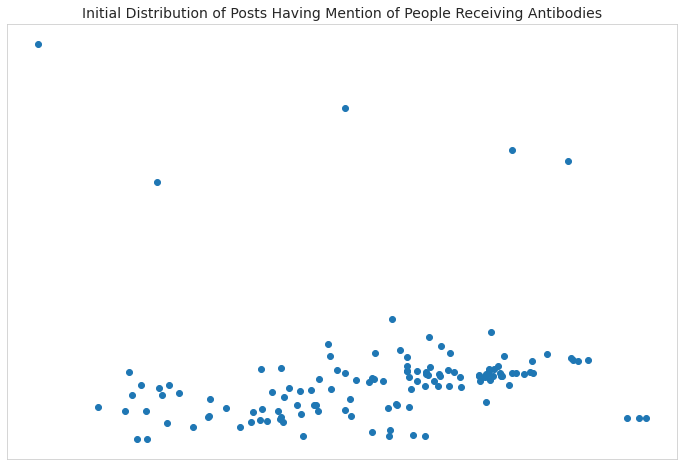

In [209]:
# Scatter plot of matched posts to find out if all fall in same cluster

sentences = list(dfout_with_infusion['Post'])

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
#ax.scatter(Y_sklearn_without_mention[:, 0], Y_sklearn_without_mention[:, 1], c='orange')
ax.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1])

for i, txt in enumerate(sentences):
    ax.annotate(txt[:0], (Y_sklearn[:, 0][i], Y_sklearn[:, 1][i]))

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title('Initial Distribution of Posts Having Mention of People Receiving Antibodies', fontsize=14)
plt.savefig('Initial_vec_distribution.png')

plt.show()

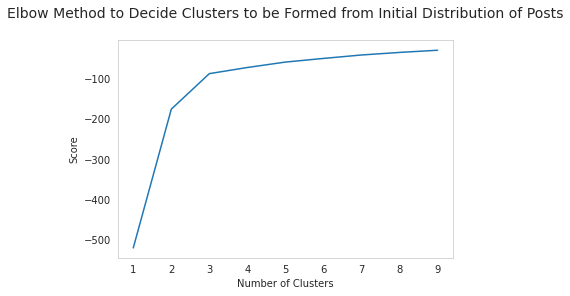

In [218]:
# Find clusters in vectors of matched posts using K Means

from sklearn.cluster import KMeans 

X = Y_sklearn

number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method to Decide Clusters to be Formed from Initial Distribution of Posts\n', fontsize=14)

# Hide grid lines
plt.grid(False)

plt.savefig('Kemans_elbow.png')

plt.show()

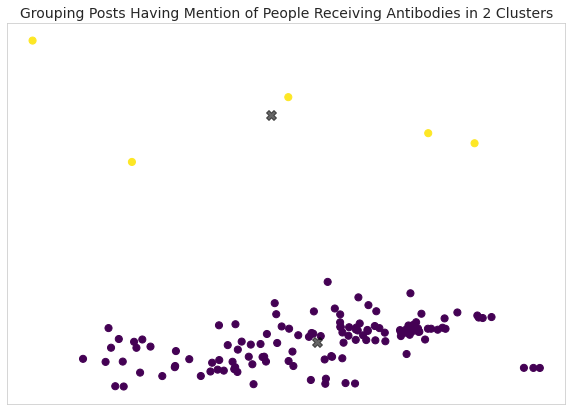

In [211]:
X = Y_sklearn
sentences = list(dfout_with_infusion['Post'])

test_e = KMeans(n_clusters=2, max_iter = 600)
fitted = test_e.fit(X)
predicted_values = test_e.predict(X)
centers = fitted.cluster_centers_

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)
ax.scatter(X[:, 0], X[:, 1], c=predicted_values, s=50, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6, marker='X')

for i, txt in enumerate(sentences):
    ax.annotate(txt[:0], (X[:, 0][i], X[:, 1][i]))

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title('Grouping Posts Having Mention of People Receiving Antibodies in 2 Clusters', fontsize=14)
plt.savefig('2_clusters.png')


df_2_clusters = pd.DataFrame({'Post':list(dfout_with_infusion['Post']), 'Cluster':predicted_values})

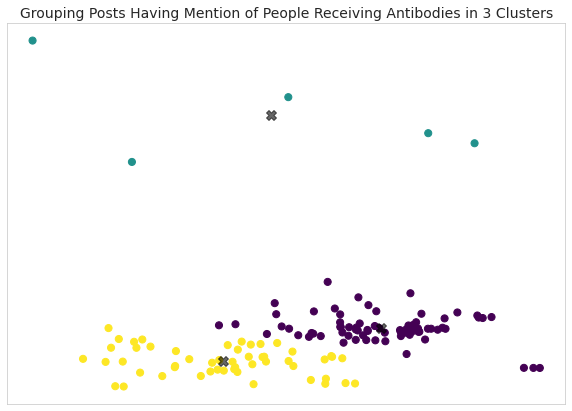

In [212]:
X = Y_sklearn
sentences = list(dfout_with_infusion['Post'])

test_e = KMeans(n_clusters=3, max_iter = 600)
fitted = test_e.fit(X)
predicted_values = test_e.predict(X)
centers = fitted.cluster_centers_

fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)
ax.scatter(X[:, 0], X[:, 1], c=predicted_values, s=50, cmap='viridis')
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.6, marker='X')

for i, txt in enumerate(sentences):
    ax.annotate(txt[:0], (X[:, 0][i], X[:, 1][i]))

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

plt.title('Grouping Posts Having Mention of People Receiving Antibodies in 3 Clusters', fontsize=14)
plt.savefig('3_clusters.png')

plt.show()

df_3_clusters = pd.DataFrame({'Post':list(dfout_with_infusion['Post']), 'Cluster':predicted_values})

In [135]:
df_2_clusters['Cluster'].value_counts(), list(df_2_clusters[df_2_clusters['Cluster']==1]['Post'])

(0    127
 1      5
 Name: Cluster, dtype: int64,
 ['An EUA for Bamlanivimab A Monoclonal Antibody for COVID ',
  'https www washingtonpost com covid monoclonal ',
  'MONOCLONAL ANTIBODIES',
  'https www nbcnews com fda authorizes eli lilly s ',
  'Deb Tasker https www nytimes com coronavirus drug eli lilly html'])

In [136]:
df_3_clusters['Cluster'].value_counts(), list(df_3_clusters[df_3_clusters['Cluster']==1]['Post']), list(df_3_clusters[df_3_clusters['Cluster']==2]['Post']), list(df_3_clusters[df_3_clusters['Cluster']==0]['Post'])

(2    75
 0    52
 1     5
 Name: Cluster, dtype: int64,
 ['An EUA for Bamlanivimab A Monoclonal Antibody for COVID ',
  'https www washingtonpost com covid monoclonal ',
  'MONOCLONAL ANTIBODIES',
  'https www nbcnews com fda authorizes eli lilly s ',
  'Deb Tasker https www nytimes com coronavirus drug eli lilly html'],
 ['Just wanted to let anyone know if you are able and fall under the criteria to get the monoclonal antibody treatment I highly recommend I feel almost normal again ',
  'You CAN NOT get these infusions with out being a study participant as part of routine care in the USA ',
  'Here is the link to the clinical trial page https www clinicaltrials gov ct results cond Covid term regeneron cntry US state city dist ',
  'If you must search inside clinical trials gov search for Covid Regeneron in the United States or the preferred country ',
  'Safety Tolerability and Efficacy of Anti Spike SARS CoV Monoclonal Antibodies for the Treatment of Ambulatory Adult Patients With C

In [137]:
# Going with 3 with Cluster 2 of 52 entries though cluster 0 also contains some entries where people received
# But majority receiving entries are in cluster 2

df_3_clusters['Cluster'].value_counts()

2    75
0    52
1     5
Name: Cluster, dtype: int64

In [149]:
selected_cluster = 0

In [150]:
# Approximate number of people that received monoclonal antibodies out of total posts (after removing comments, share etc - only names remain)

df_3_clusters['Cluster'].value_counts()[selected_cluster], df.shape[0]

(52, 11557)

In [152]:
# TODO - Find only those entries in df that contain non-person names and use that as total

data = {'Posts containing Mention of People Receiving Antibodies': df_3_clusters['Cluster'].value_counts()[selected_cluster], 'Other Posts':(df.shape[0]-df_3_clusters['Cluster'].value_counts()[selected_cluster])}
data_df = pd.DataFrame({'Count_Type':data.keys(), 'Count_Value':data.values()})
data_df

,Count_Type,Count_Value
0,Posts containing Mention of People Receiving A...,52
1,Other Posts,11505


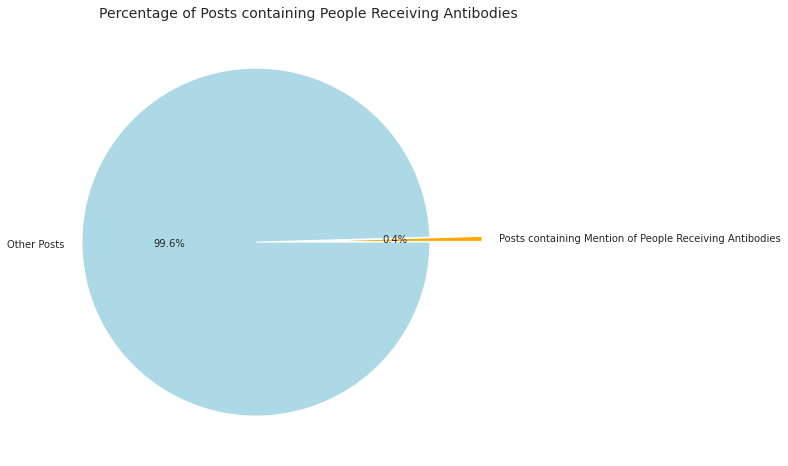

In [158]:
#Using matplotlib
pie, ax = plt.subplots(figsize=[8,8])
labels = data.keys()
plt.pie(x=data.values(), autopct="%.1f%%", labels=data.keys(), pctdistance=0.5, explode=(0, 0.3), colors=['orange','lightblue'])
plt.title("Percentage of Posts containing People Receiving Antibodies", fontsize=14);
pie.savefig("PercentageReceivingAntibodiesFromTotalPosts.png")

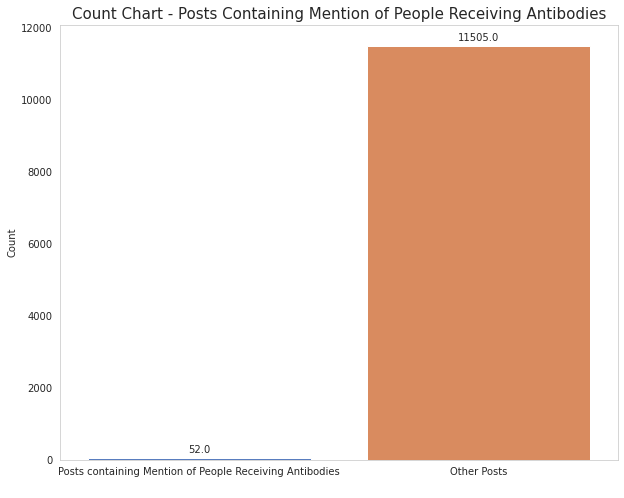

In [159]:
#Seaborn barplot
#sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x=data_df['Count_Type'], y='Count_Value', data=data_df, ci=None, palette="muted",orient='v')
ax.set_title("Count Chart - Posts Containing Mention of People Receiving Antibodies", fontsize=15)
ax.set_ylabel ("Count")
ax.set_xlabel (" ")

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    #ax.text (rect.get_x() + rect.get_width() / 2, rect.get_height(), rect.get_height(), weight='bold' )
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
bar.savefig("Count_Chart.png");

# Hide grid lines
ax.grid(False)

In [148]:
len(Y_sklearn), df_3_clusters.shape, df_3_clusters.columns, type(Y_sklearn), len(Y_sklearn[0])

(132, (132, 2), Index(['Post', 'Cluster'], dtype='object'), numpy.ndarray, 2)

In [172]:
dfout_with_infusion['Post']
Y_sklearn_final_list_x = []
Y_sklearn_final_list_y = []

infusion_count = 0
for x in df_3_clusters['Cluster']:
  if(x==selected_cluster):
    Y_sklearn_final_list_x.append(Y_sklearn[infusion_count][0])
    Y_sklearn_final_list_y.append(Y_sklearn[infusion_count][1])
  infusion_count += 1

len(Y_sklearn_final_list_x), Y_sklearn_final_list_x[0]

(52, 5.6307273)

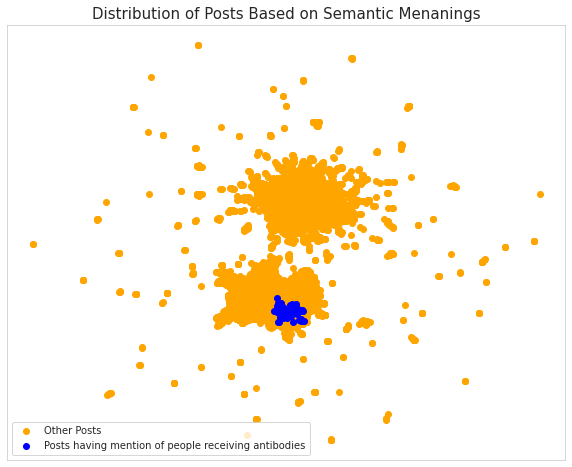

In [182]:
sentences = list(dfout_with_infusion['Post'])

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)
ax.scatter(Y_sklearn_without_mention[:, 0], Y_sklearn_without_mention[:, 1], c='orange', label='Other Posts')
ax.scatter(Y_sklearn_final_list_x, Y_sklearn_final_list_y, c='blue', label='Posts having mention of people receiving antibodies')
ax.set_title("Distribution of Posts Based on Semantic Menanings", fontsize=15)

#for i, txt in enumerate(sentences):
    #ax.annotate(txt[:10], (Y_sklearn[:, 0][i], Y_sklearn[:, 1][i]))

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])

ax.legend()

plt.show()
fig.savefig('Distribution_of_posts.png')

In [183]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

In [184]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [187]:
stop_words = stopwords.words('english')

words_to_be_removed_from_stopwords = ["no",
"nor",
"not",
"very",
"only",
"also",
"don",
"don't",
"ain",
"aren",
"aren't",
"couldn",
"couldn't",
"didn",
"didn't",
"doesn",
"doesn't",
"hadn",
"hadn't",
"hasn",
"hasn't",
"haven",
"haven't",
"isn",
"isn't",
"mightn",
"mightn't",
"mustn",
"mustn't",
"needn",
"needn't",
"shan",
"shan't",
"shouldn",
"shouldn't",
"wasn",
"wasn't",
"weren",
"weren't",
"won",
"won't",
"wouldn",
"wouldn't"]

print('Number of stopwords before: ', len(stop_words))

for x in words_to_be_removed_from_stopwords:
  if(x in stop_words):
    stop_words.remove(x)

print('Number of stopwords after one: ', len(stop_words))

stop_words.extend(['day', 'time', 'got', 'like', 'people', 'know', 'did', 'still'])
print('Number of stopwords after two: ', len(stop_words))

Number of stopwords before:  179
Number of stopwords after one:  137
Number of stopwords after two:  145


In [190]:
from wordcloud import WordCloud

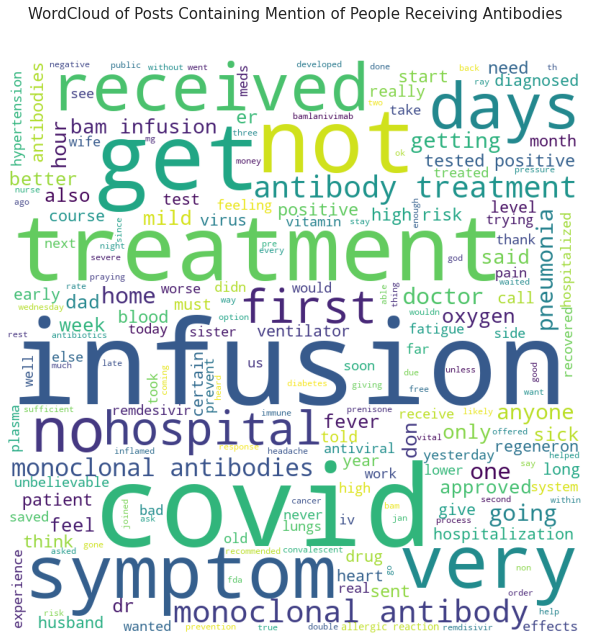

In [196]:
df_cluster_1 = df_3_clusters[df_3_clusters['Cluster']==selected_cluster]

comment_words = '' 

# iterate through the csv file 
for val in df_cluster_1['Post']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    tokens_list_without_stopwords = []
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
        if(tokens[i] not in stop_words):
          tokens_list_without_stopwords.append(tokens[i])
      
    comment_words += " ".join(tokens_list_without_stopwords)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words) 

wordcloud.to_file("wordcloud_posts_with_antibodies_receipt_mention.png")
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.title("WordCloud of Posts Containing Mention of People Receiving Antibodies\n\n", fontsize=15)
  
plt.show()

In [199]:
comment_words, type(comment_words)

('joined regeneron remdisivir double blind research study outpatient treatment choice receive regeneron monoclonal antibodies infusion yesterday regeneron one infusion believe real drug blinding severe headache gone hours remdisivir option would course infusions husband joined prevention covid living covid individuals research study injections monoclonal antibodies christie rowland fowler don think received hospital infusion not asked wanted part clinical trial hospitalized covid bilateral pneumonia acute hypoxia received five remdesiver infusions august days hospitalization days isolation tolerated infusion without effects tested positive virus husband days ago showing symptoms fatigue shortness breath nothing bad no fever far ok except fatigue monitoring exygen level cancer bone marrow survivor high risk wandering monoclonal antibody treatment experience received monoclonal antibody treatment however th symptoms started didn get benefit told late getting first days symptoms start bet

In [203]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

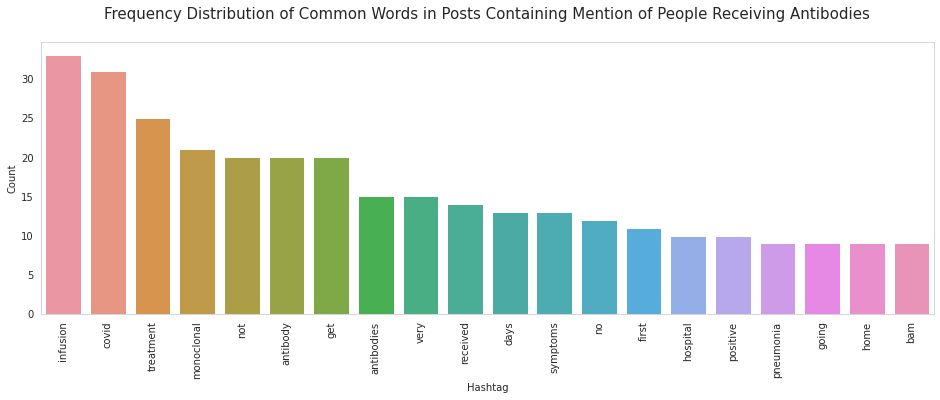

In [215]:
#words frequency

nonracist_tweets = nltk.FreqDist(nltk.tokenize.word_tokenize(comment_words))
df1 = pd.DataFrame({'Hashtag': list(nonracist_tweets.keys()),'Count':list(nonracist_tweets.values())})

#selecting top 20 most frequent hashtags
df1 = df1.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=df1, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
ax.set_title('Frequency Distribution of Common Words in Posts Containing Mention of People Receiving Antibodies\n', fontsize=15)
# Hide grid lines
ax.grid(False)
plt.xticks(rotation='vertical')

plt.savefig('FreqDist_words_posts_antibodies_receipt.png')

plt.show()